<a href="https://colab.research.google.com/github/Hidrovales/Balanco_Hidrico/blob/main/Gerar_SerieETo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Calcula série de Evapotranspiração de Referência com FAO 56


<table>
  <tr>
    <td><img src="https://github.com/Hidrovales/Balanco_Hidrico/blob/main/Figuras/salinas_vertical_jpg.jpg?raw=true" width="100"></td>
    <td><img src="https://github.com/Hidrovales/Balanco_Hidrico/blob/main/Figuras/COLORlogohorizontal.png?raw=true" width="100"></td>
  </tr>
</table>


[HIDROVALES - GRUPO DE PESQUISA EM RECURSOS HÍDRICOS E AMBIENTAIS DO NORTE DE MINAS GERAIS](http://www.hidrovales.com.br/)

Patrícia O. Lucas, Marcelo R. Vicente e Ronaldo M. Santos



###Pacotes

In [ ]:
!git clone https://github.com/Hidrovales/Balanco_Hidrico.git

Cloning into 'Balanco_Hidrico'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (163/163), done.
remote: Total 168 (delta 82), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (168/168), 1.48 MiB | 16.47 MiB/s, done.
Resolving deltas: 100% (82/82), done.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from Balanco_Hidrico import Calcula_ETo

###Upload da base de dados já ajustada

In [ ]:
dataset =  pd.read_csv('https://raw.githubusercontent.com/Hidrovales/Balanco_Hidrico/main/Datasets/RIO_PARDO_MINAS_AJUSTADO.csv',delimiter=',' )
dataset = dataset.drop(["Unnamed: 0"],axis=1) #-------------------> Exclusão de colunas
dataset.head(3)

,DATA,PRECIPITACAO_TOTAL,PRESSAO_ATMOSFERICA,TEMPERATURA_PONTO_ORVALHO,TEMPERATURA_MAXIMA,TEMPERATURA_MEDIA,TEMPERATURA_MINIMA,UMIDADE_RELATIVA,UMIDADE_RELATIVA.1,VENTO,VELOCIDADE_VENTO,J
0,2018-01-01,0.0,918.520833,18.929167,31.4,23.829167,19.1,75.958333,43.0,10.8,1.149975,1
1,2018-01-02,0.4,916.429167,18.412500,32.4,22.854167,18.8,79.041667,35.0,17.8,1.318264,2
2,2018-01-03,4.6,916.487500,19.666667,30.8,21.900000,20.1,88.208333,47.0,12.2,0.944288,3


###Vizualização da base de dados

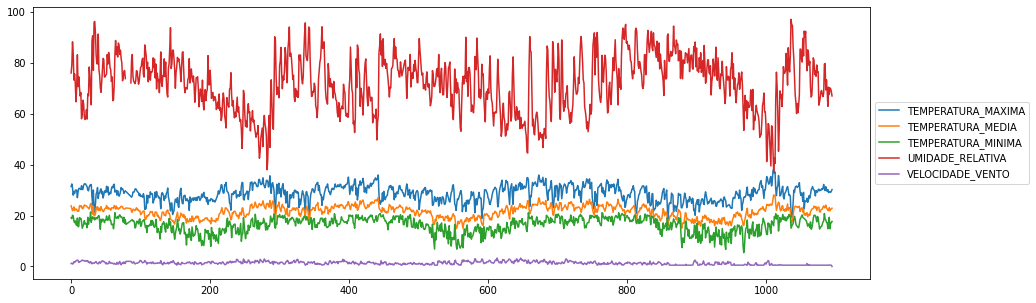

In [ ]:
dataset.head()
dataset['TEMPERATURA_MAXIMA'].plot(figsize=(15,5))
dataset['TEMPERATURA_MEDIA'].plot(figsize=(15,5))
dataset['TEMPERATURA_MINIMA'].plot(figsize=(15,5))
dataset['UMIDADE_RELATIVA'].plot(figsize=(15,5))
dataset['VELOCIDADE_VENTO'].plot(figsize=(15,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
pass

###Calculo da $ET_o$:

In [ ]:
#Constantes importantes
latitude = -15.72305554 #--em graus
altitude = 850.06  #--em metros

#: Solar constant [ MJ m-2 min-1]
GSC = 0.0820

# Stefan Boltzmann constant [MJ K-4 m-2 dia-1]
sigma = 0.000000004903

#Fluxo de calor do solo (G) para o período de 1 dia ou 10 dias
G = 0

In [ ]:
serie_eto = Calcula_ETo.gera_serie(dataset['TEMPERATURA_MINIMA'], dataset['TEMPERATURA_MAXIMA'], dataset['UMIDADE_RELATIVA'], 
                                   dataset['VELOCIDADE_VENTO'], dataset['J'], latitude, altitude, GSC, sigma, G, 
                                   dataset['TEMPERATURA_MEDIA'])

###Visualizando a série temporal de $ET_o$

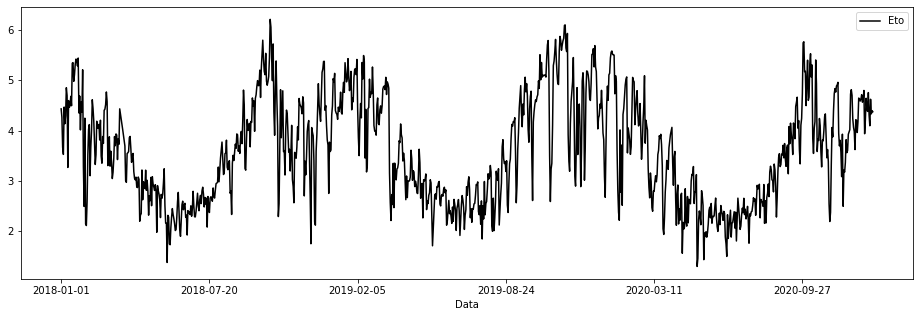

In [ ]:
df = pd.DataFrame(serie_eto,columns=['Eto'])
df.insert(0,'Data', dataset.loc[:,'DATA'])
df.set_index('Data', inplace=True)
df['2018-01-01':].plot(figsize=(16,5), color='k')

###Salvando a base de dados ajustada

In [ ]:
df.to_csv('RIO_PARDO_MINAS_ETo.csv',index=True)